# 0.Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc 
import platform

# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
rawdata = pd.read_excel('./used_car_ver8.xlsx')

In [9]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2489 non-null   int64  
 1   제조사         2489 non-null   int64  
 2   모델          2489 non-null   int64  
 3   이름          2489 non-null   object 
 4   연도          2489 non-null   int64  
 5   주행거리        2489 non-null   int64  
 6   연료          2489 non-null   int64  
 7   배기량         2489 non-null   int64  
 8   색상          2489 non-null   int64  
 9   보증정보        2489 non-null   int64  
 10  가격          2489 non-null   int64  
 11  신차대비가격      2489 non-null   float64
 12  옵션_선루프      1929 non-null   float64
 13  옵션_파노라마선루프  1929 non-null   float64
 14  옵션_열선앞      1929 non-null   float64
 15  옵션_열선뒤      1929 non-null   float64
 16  옵션_전방센서     1929 non-null   float64
 17  옵션_후방센서     1929 non-null   float64
 18  옵션_전방캠      1929 non-null   float64
 19  옵션_후방캠      1929 non-null  

In [10]:
rawdata.columns

Index(['Unnamed: 0', '제조사', '모델', '이름', '연도', '주행거리', '연료', '배기량', '색상',
       '보증정보', '가격', '신차대비가격', '옵션_선루프', '옵션_파노라마선루프', '옵션_열선앞', '옵션_열선뒤',
       '옵션_전방센서', '옵션_후방센서', '옵션_전방캠', '옵션_후방캠', '옵션_어라운드뷰', '옵션_네비순정',
       '보험이력'],
      dtype='object')

In [11]:
used_car = rawdata[['제조사', '모델', '이름', '연도', '주행거리', '연료',
       '배기량', '색상', '보증정보', '가격', '신차대비가격', '옵션_선루프', '옵션_파노라마선루프', '옵션_열선앞',
       '옵션_열선뒤', '옵션_전방센서', '옵션_후방센서', '옵션_전방캠', '옵션_후방캠', '옵션_어라운드뷰',
       '옵션_네비순정', '보험이력']]

In [12]:
used_car.head()

,제조사,모델,이름,연도,주행거리,연료,배기량,색상,보증정보,가격,...,옵션_파노라마선루프,옵션_열선앞,옵션_열선뒤,옵션_전방센서,옵션_후방센서,옵션_전방캠,옵션_후방캠,옵션_어라운드뷰,옵션_네비순정,보험이력
0,2,49,쉐보레 더 뉴 스파크 1.0 프리미어,2021,16250,2,999,1,1,11000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,5,86,현대 올 뉴 투싼 1.6 디젤 2WD 스마트,2018,67696,6,1598,1,1,16990000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0,42,기아 더 뉴 봉고3 캠핑카 -,2020,29000,6,2497,1,0,74800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0,42,기아 더 뉴 봉고3 캠핑카 -,2020,5600,6,2497,1,0,71500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,3,30,쌍용 렉스턴 스포츠 칸 2.2 디젤 4WD 캠핑카,2021,5468,6,2157,1,0,69800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# 1.EDA

## 제조사 & 가격

- 0 = 기아
- 1 = 르노삼성
- 2 = 쉐보레
- 3 = 쌍용
- 4 = 제네시스
- 5 = 현대

In [21]:
used_car['제조사'] = used_car['제조사'].map({0:'기아', 1:'르노삼성', 2:'쉐보레', 
                      3:'쌍용', 4:'제네시스', 5:'현대'}).astype(object)

* 현대차의 프리미엄 자동차 브랜드인 제네시스가 높은 가격대를 형성하고 있음
* 나머지 제조사는 비슷한 가격대를 형성하고 있으나 그 중 기아의 가격대가 상대적으로 높아 보임

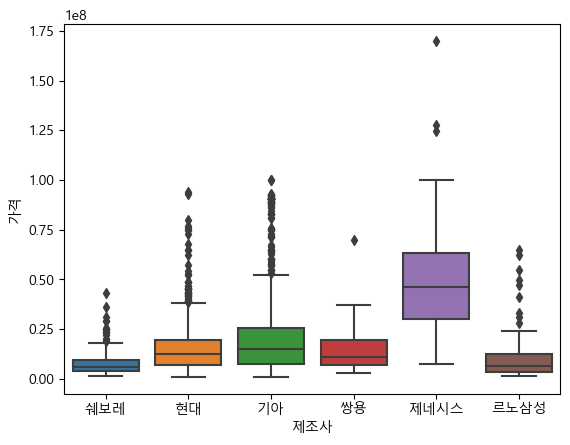

<Figure size 900x600 with 0 Axes>

In [22]:
sns.boxplot(used_car['제조사'],used_car['가격'])
plt.figure(figsize = (9,6))

plt.show()

## 가격에 영향을 미치는 요소 파악

Text(0.5, 1.0, '가격')

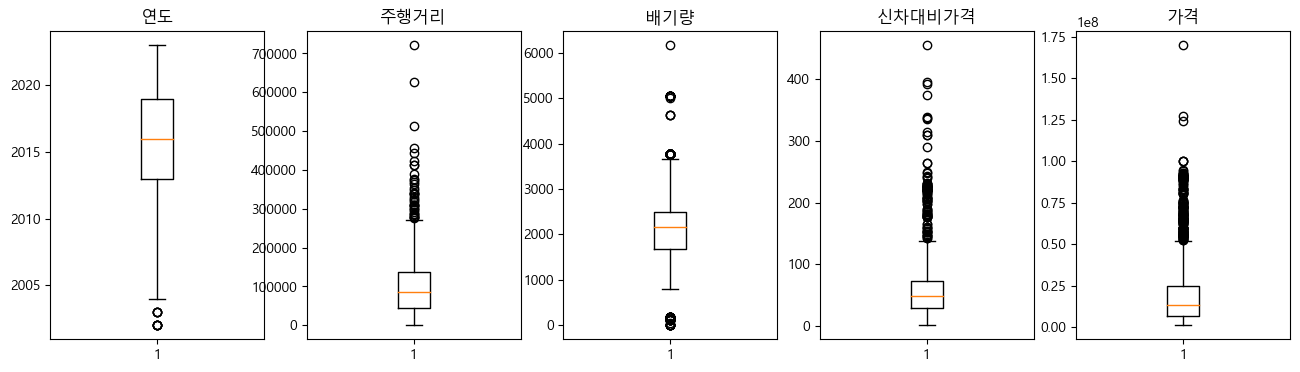

In [24]:
fig, ax = plt.subplots(1, 5, figsize = (16,4))

ax[0].boxplot(list(used_car.연도))
ax[0].set_title('연도')

ax[1].boxplot(list(used_car.주행거리))
ax[1].set_title('주행거리')

ax[2].boxplot(list(used_car.배기량))
ax[2].set_title('배기량')

ax[3].boxplot(list(used_car.신차대비가격))
ax[3].set_title('신차대비가격')

ax[4].boxplot(list(used_car.가격))
ax[4].set_title('가격')

1) 구매 연도
* 최근일수록 가격이 높은 것을 확인

2) 주행거리
* 짧을 수록 가격이 높은 것을 확인

3) 배기량
* 가격에 크게 영향을 미치지 않는 것으로 판단됨  
* 배기량이 0인 전기차는 가격이 높게 형성되어 있음  
* 전기차 수요가 최근에 증가했기 때문에 중고차 시장에서 거래되는 경우가 상대적으로 적고 이로 인해 노이즈로 판단될 수 있음
    
4) 신차 대비 가격
* 중고차 가격과 양의 상관 관계를 보이기 때문에 가격에 많은 영향을 미칠 것이라고 예상했던 신차 대비 가격은 비정형적 양상을 보임

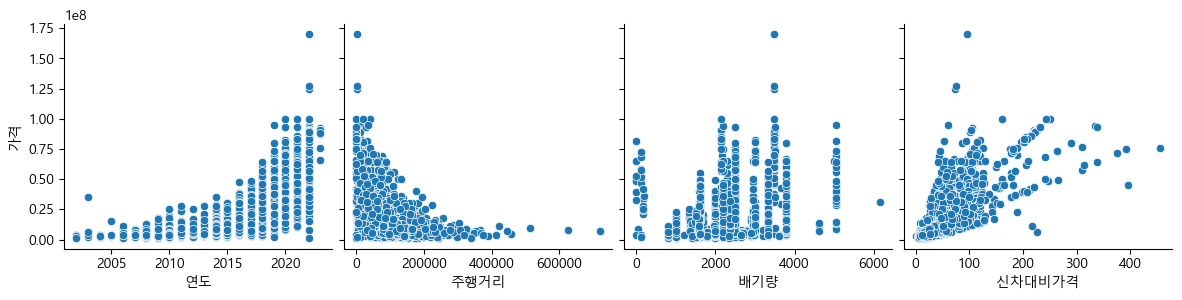

In [25]:
sns.pairplot(data = used_car, x_vars = ['연도', '주행거리', '배기량', '신차대비가격'],
             y_vars = '가격', size = 3)

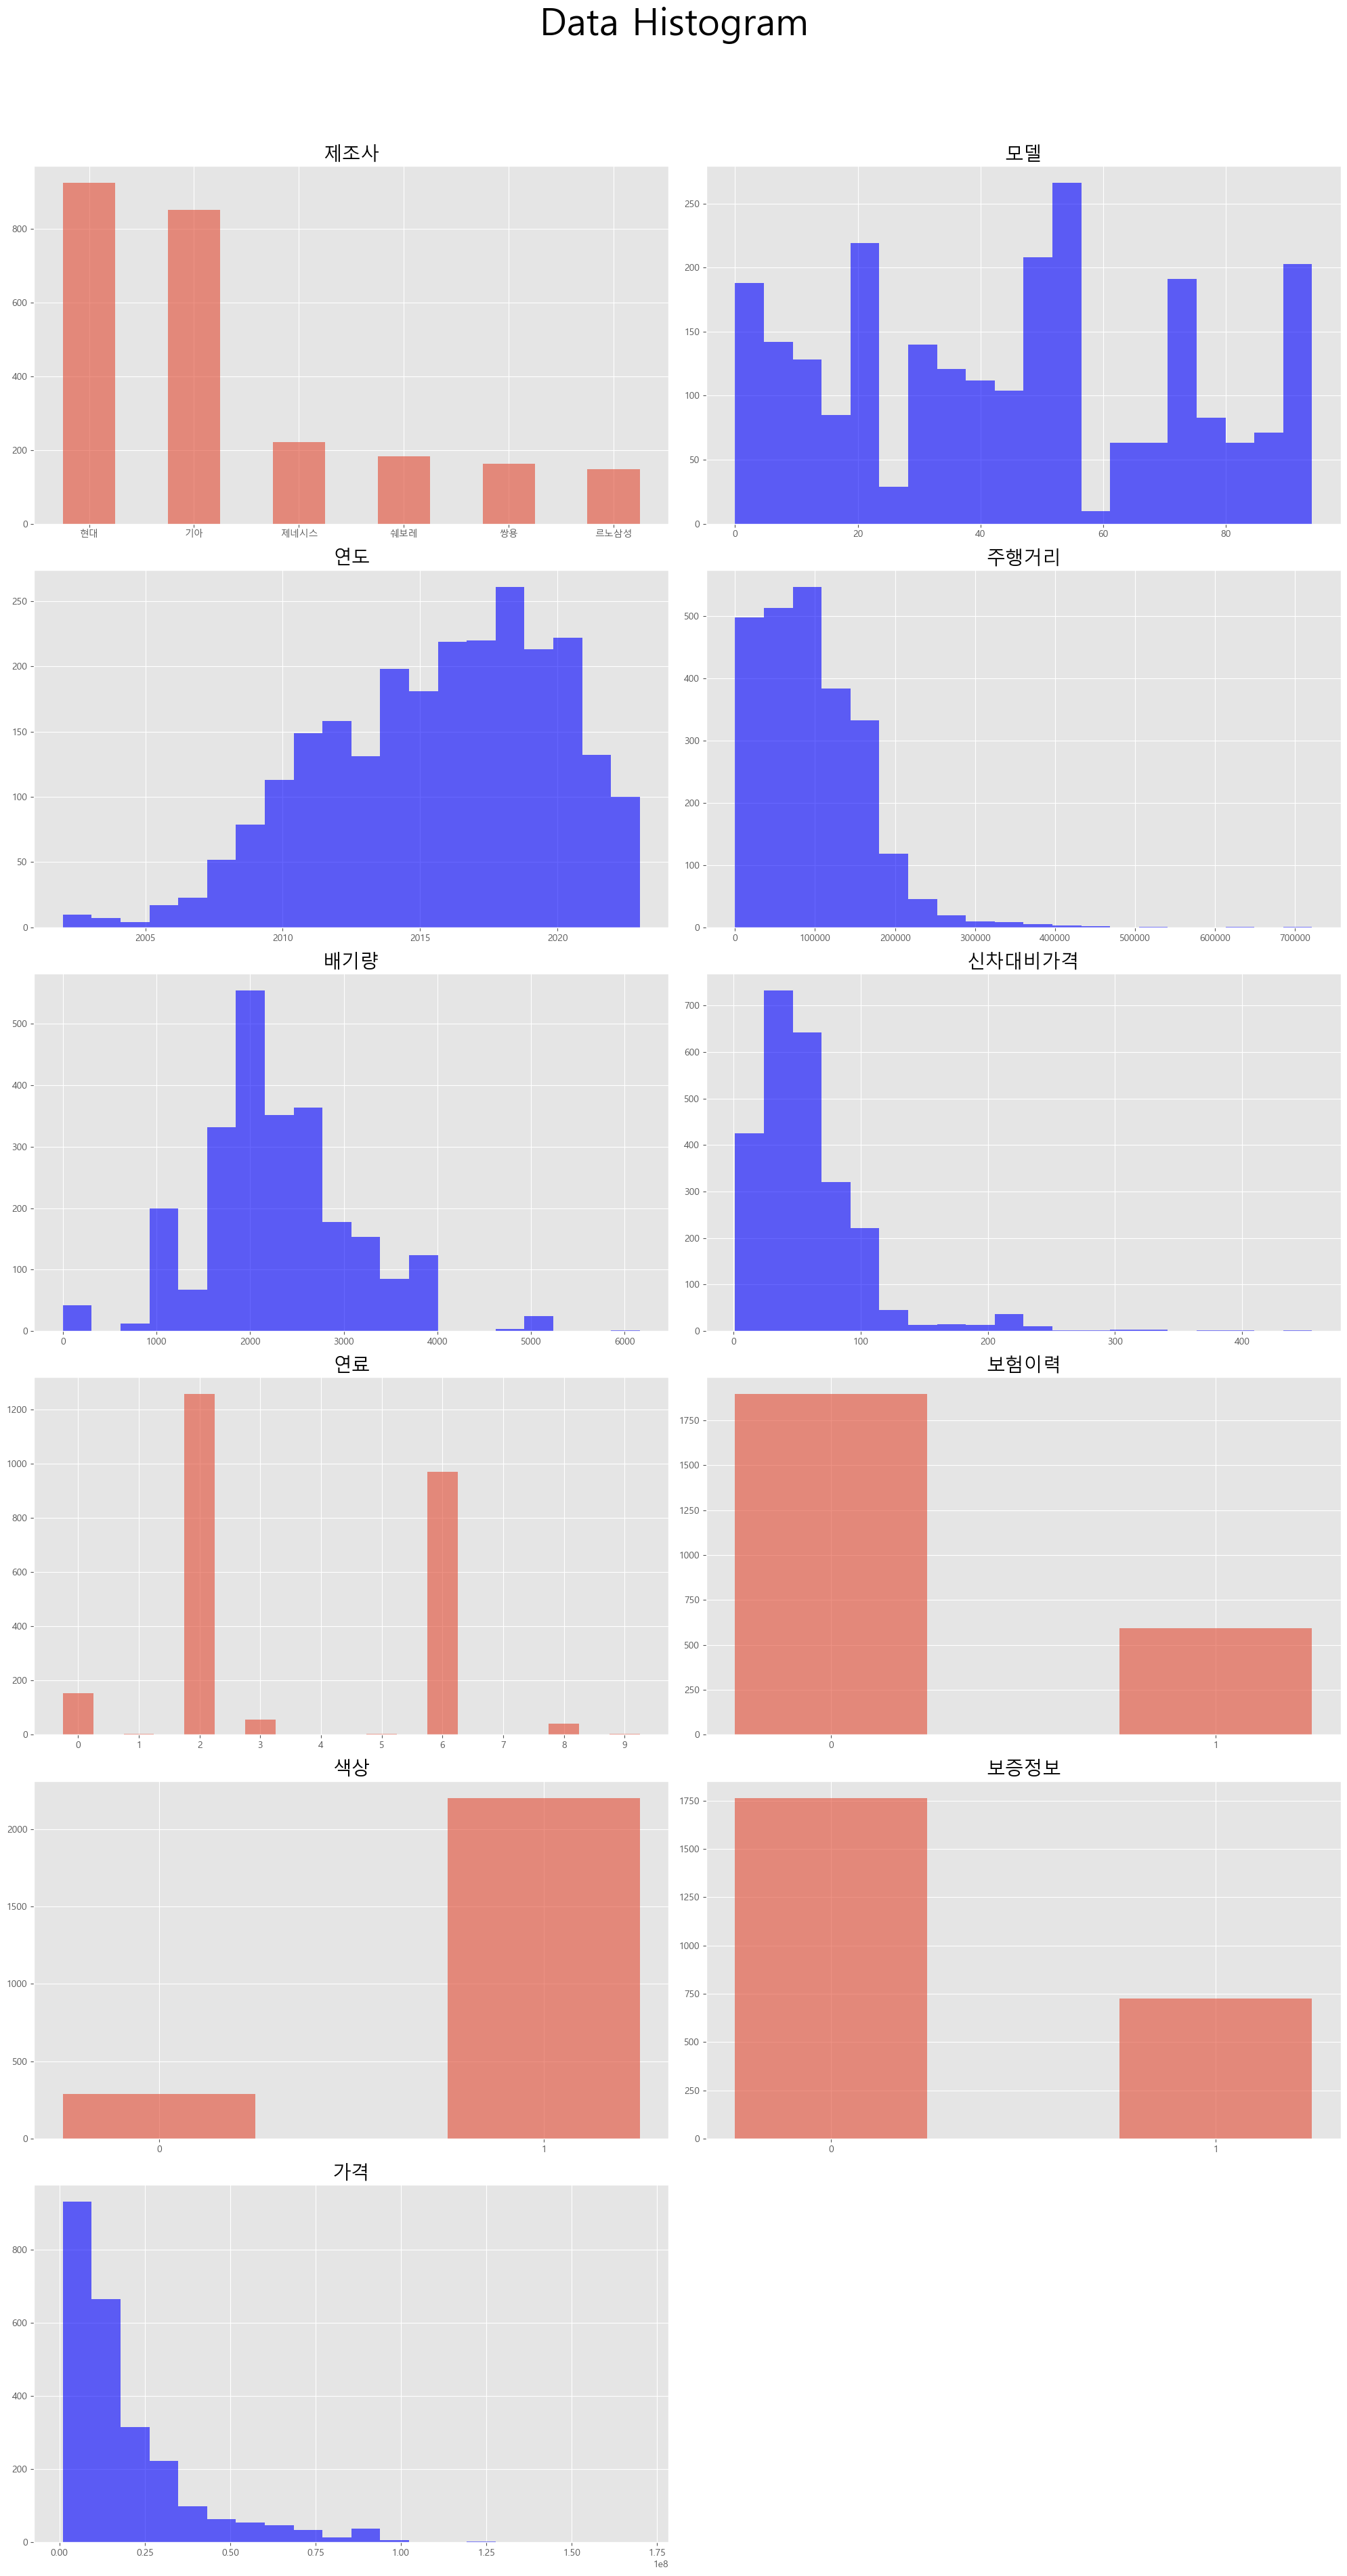

In [54]:
plt.style.use("ggplot")

plt.figure(figsize=(20,40))
plt.suptitle("Data Histogram", fontsize = 40)

cols = selectdata.columns
for i in range(len(cols)):
    plt.subplot(6,2,i+1)
    plt.title(cols[i], fontsize=20)
    if len(selectdata[cols[i]].unique()) > 20:
        plt.hist(selectdata[cols[i]], bins = 20, color = 'b', alpha = 0.6)
    else:
        temp = selectdata[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width = 0.5, alpha = 0.6)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 보험 이력 & 가격

- 등록 = 0
- 미등록 = 1  

In [40]:
used_car['보험이력'] = used_car['보험이력'].map({0:'등록', 
                                         1:'미등록'}).astype(object)

* 미등록이 상대적으로 높은 가격대를 보임

<AxesSubplot:xlabel='보험이력', ylabel='가격'>

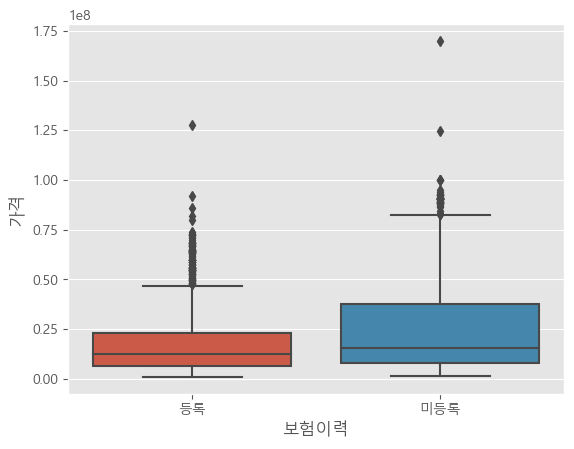

In [41]:
sns.boxplot(x = '보험이력', y = '가격', data = used_car)

### 히트맵

* 가격과 양의 상관 관계를 보이는 것 : 연도, 배기량, 신차 대비 가격, 보증 정보
* 가격과 음의 상관 관계를 보이는 것 : 모델, 주행거리

<AxesSubplot:>

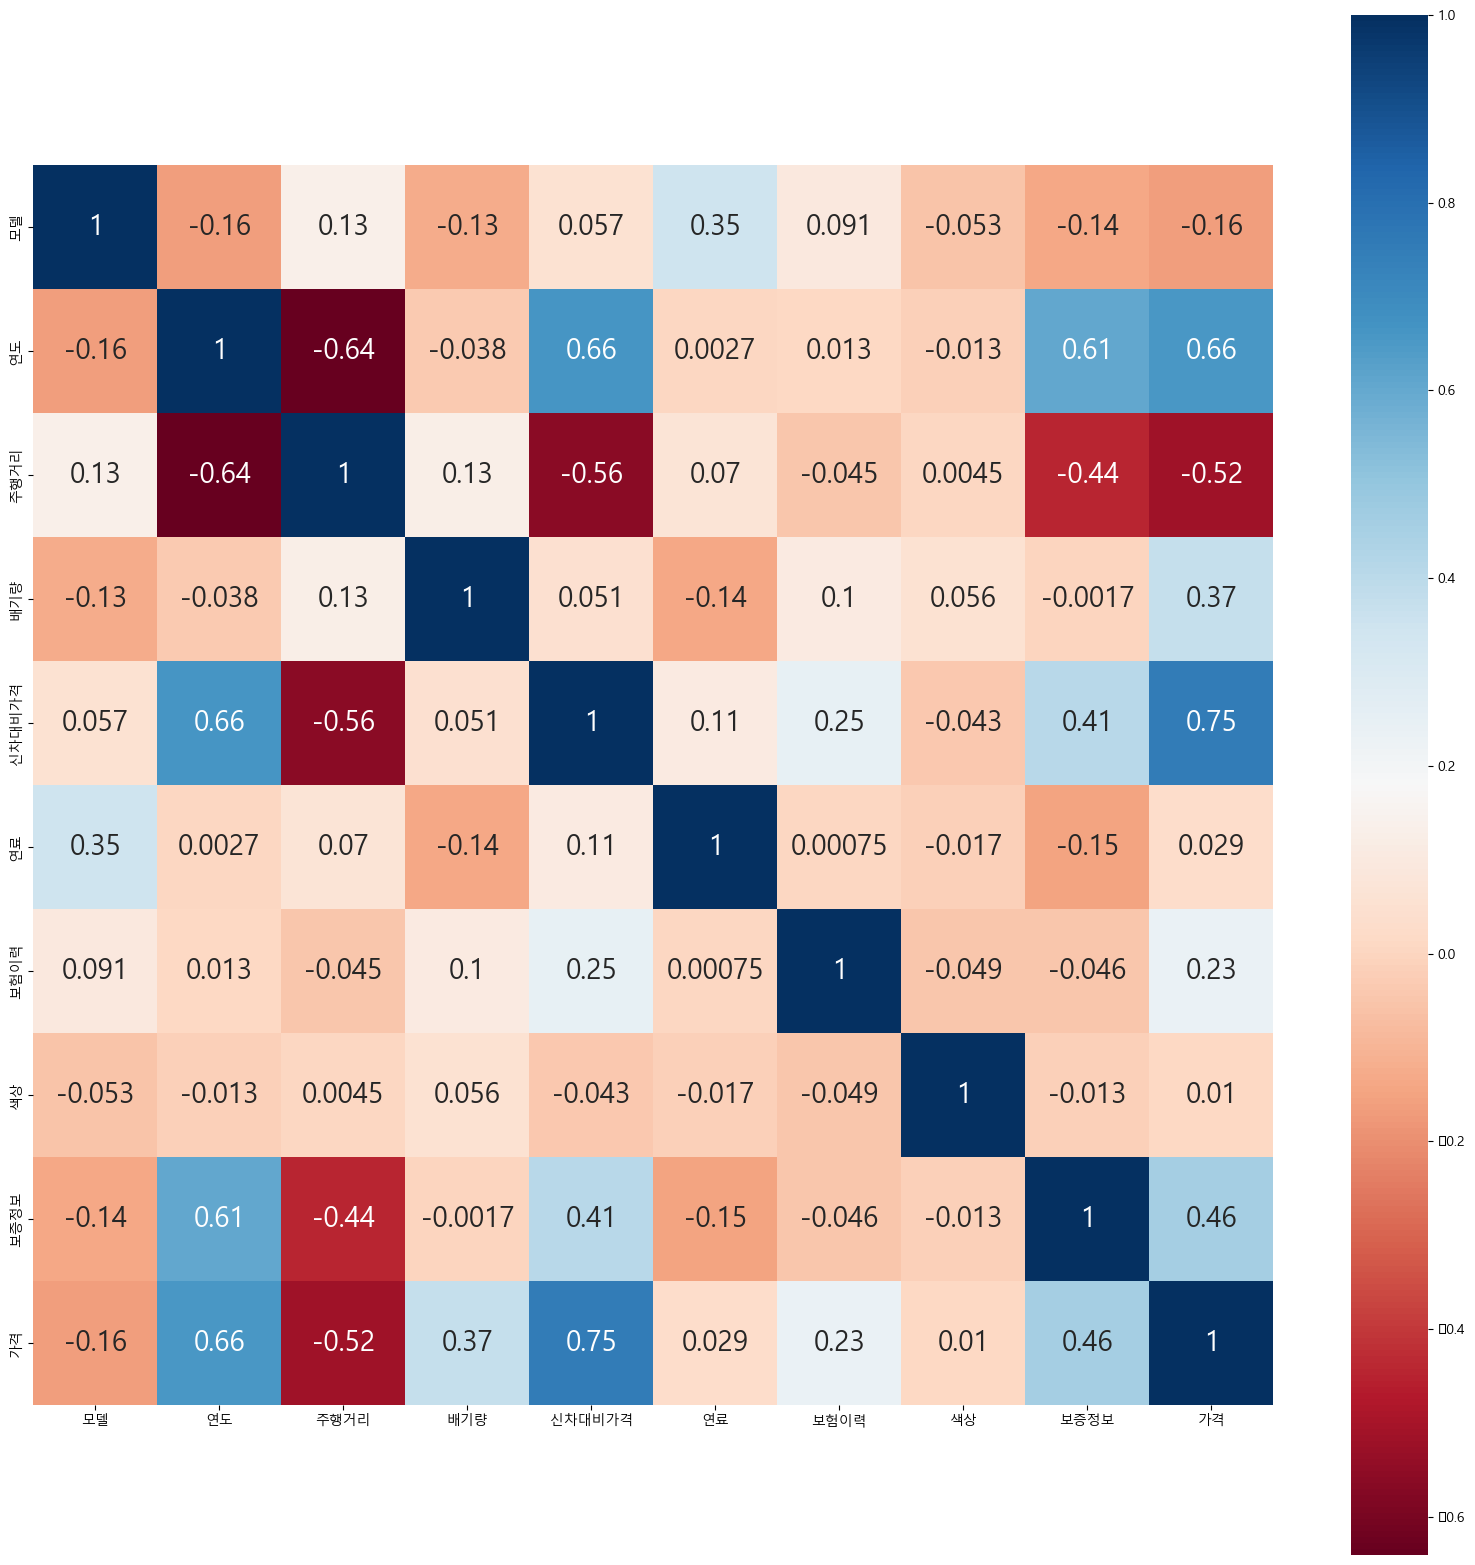

In [28]:
plt.figure(figsize = (20, 20))

selectdata = pd.DataFrame(used_car, columns=['제조사', '모델', '연도', '주행거리', '배기량', '신차대비가격',
                                            '연료', '보험이력', '색상', '보증정보','가격'])

sns.heatmap(selectdata.corr(), annot=True, square = True, annot_kws = {'size':20}, cmap='RdBu')